In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [2]:
num_data = 1000
num_epoch = 500

x_1 = init.uniform_(torch.FloatTensor(num_data, 1), -5, 5)
x_2 = init.uniform_(torch.FloatTensor(num_data, 1), -5, 5)

noise_1 = init.normal_(torch.FloatTensor(num_data, 1), std=2)
noise_2 = init.normal_(torch.FloatTensor(num_data, 1), std=2)

y_1 = x_1**4 + x_1**2
y_1_noise = (x_1+noise_1)**4 + (x_1+noise_1)**2

y_2 = x_2**2 + x_2**1
y_2_noise = (x_2+noise_2)**2 + (x_2+noise_2)

In [3]:
model_1 = nn.Linear(in_features=1, out_features=1)
model_2 = nn.Linear(in_features=1, out_features=1)

loss_func_1 = nn.MSELoss()
loss_func_2 = nn.MSELoss()

# 최적화함수

In [4]:
learning_rate = 0.01
optimizer_1 = optim.SGD(model_1.parameters(), lr=learning_rate)
optimizer_2 = optim.SGD(model_2.parameters(), lr=learning_rate)

# y_1

In [5]:
label_1 = y_1_noise

for i in range(num_epoch):
    
    optimizer_1.zero_grad()
    output_1 = model_1(x_1)
    
    loss_1 = loss_func_1(output_1, label_1)
    loss_1.backward()
    optimizer_1.step()
    
    if i%50 == 0:
        print(loss_1.data)
    
print("최종 loss\n",loss_1.data, "\n최종 weight\n",model_1.weight)

tensor(1312084.3750)
tensor(1160471.6250)
tensor(1140717.1250)
tensor(1138093.7500)
tensor(1137745.3750)
tensor(1137699.2500)
tensor(1137693.)
tensor(1137692.1250)
tensor(1137691.8750)
tensor(1137692.)
최종 loss
 tensor(1137691.8750) 
최종 weight
 Parameter containing:
tensor([[13.4743]], requires_grad=True)


# y_2

In [6]:
label_2 = y_2_noise

for i in range(num_epoch):
    
    optimizer_2.zero_grad()
    output_2 = model_2(x_2)
    
    loss_2 = loss_func_2(output_2, label_2)
    loss_2.backward()
    optimizer_2.step()
    
    if i%50 == 0:
        print(loss_2.data)
    
print("최종 loss\n",loss_2.data, "\n최종 weight\n",model_2.weight)

tensor(334.8633)
tensor(213.6299)
tensor(198.4064)
tensor(196.3802)
tensor(196.1105)
tensor(196.0747)
tensor(196.0699)
tensor(196.0692)
tensor(196.0692)
tensor(196.0691)
최종 loss
 tensor(196.0691) 
최종 weight
 Parameter containing:
tensor([[1.2893]], requires_grad=True)


# 모델 검증

   # y_1

In [7]:
num_test_data = 1000

test_data = init.uniform_(torch.FloatTensor(num_test_data, 1), -5, 5)

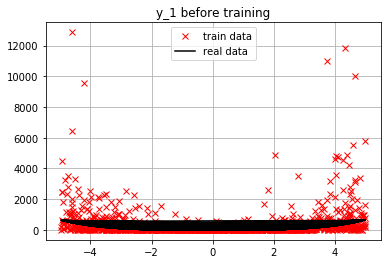

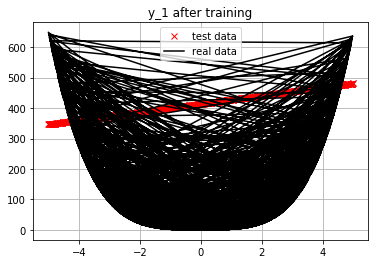

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_1.data, y_1_noise.data, 'rx')
plt.plot(x_1.data, y_1.data, 'k-')
plt.legend(['train data', 'real data'])
plt.title('y_1 before training')
plt.grid(True)
plt.show()

plt.plot(test_data.data, model_1(test_data).data, 'rx')
plt.plot(test_data.data, test_data**4+test_data**2, 'k-')
plt.legend(['test data', 'real data'])
plt.title('y_1 after training')
plt.grid(True)
plt.show()

# y_2

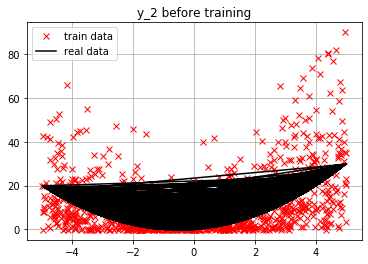

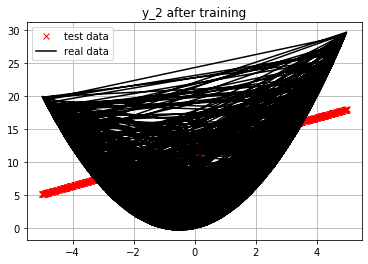

In [9]:
plt.plot(x_2.data, y_2_noise.data, 'rx')
plt.plot(x_2.data, y_2.data, 'k-')
plt.legend(['train data', 'real data'])
plt.title('y_2 before training')
plt.grid(True)
plt.show()

plt.plot(test_data.data, model_2(test_data).data, 'rx')
plt.plot(test_data.data, test_data**2+test_data, 'k-')
plt.legend(['test data', 'real data'])
plt.title('y_2 after training')
plt.grid(True)
plt.show()